### Customer Lifetime Value Prediction

CLV merupakan score yang mendeskripsikan value customer bagi revenue perusahaan. <br>
Tinggi rendahnya score pada tiap customer diperoleh berdasarkan seberapa lama/sering customer menjalin hubungan dengan perusahaan, serta seberapa besar nilai masukan ataupun cost yang dihasilkan oleh customer bagi perusahaan.<br>
Mengetahui CLV score dapat membantu perusahaan dalam budgeting & financial planning, penerapan business & marketing strategy pada tiap jenis customer ataupun secara personalized nantinya.<br>
Oleh karena itu, **perusahaan memerlukan sistem yang bisa melakukan prediksi CLV score dengan minimum error sekecil mungkin agar perusahaan bisa mendapatkan gambaran (expected future) yang bisa dimanfaatkan untuk mengetahui potentially profitable customer, produk yang sedang diminati customer serta strategi yang tepat untuk meningkatkan retensi customer terhadap perusahaan.**


**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | Type of vehicle class |
| Coverage | Object | Type of vehicle insurance |
| Renew Offer Type | Object | Type of insurance renewal offer |
| EmployementStatus | Object | Current status of customer in professional term |
| MaritalStatus | Object | Current status of customer in relationship term |
| Education | Object | Education |
| Number of Policies | Float | Number of insurance policies that customer holds |
| Monthly Premium Auto | Float | Amount the policyholder pays monthly for their auto insurance* coverage |
| Total Claim Amount | Float | Total amount of money the insurance company has paid out in claims. |
| Income | Float | Annual income of customer |
| Customer Lifetime Value | Float | Metric that estimates the total revenue a company can expect from a customer |

*Auto Insurance Policy is an insurance that covers damages or losses to the policyholder's vehicle <br>

**Regression Metrics** <br>
1. MedAE: Nilai *rata error dari hasil prediksi dalam skala unit.
2. MedAPE**: Nilai *rata error dari hasil prediksi dalam skala persen. 
3. R2 Score: Mengukur kemampuan dalam mengenali varians data terhadap target 
4. RMSE: Identifikasi besaran outlier pada error dalam skala unit. *(additional)*
5. MAPE: Identifikasi besaran outlier pada error dalam skala persen. *(additional)*
**menggunakan formula: abs(y_pred - y_true)/y_true

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
# from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv(r'C:\Clarenti\Data\Project\Py\Analytics\DS/3/dataset_kelompok/data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [4]:
df.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

In [5]:
df.duplicated().sum()

618

In [4]:
df.drop_duplicates(inplace=True)

In [7]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


In [8]:
f"80% data merupakan customer dengan score < {np.percentile(df['Customer Lifetime Value'], 80)}"

'80% data merupakan customer dengan score < 10314.52484'

Anomali & Consistency Data

In [106]:
df[ (df.Income == 0) & (df.EmploymentStatus != 'Unemployed') ]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value


In [107]:
len(df[ (df.Income > 0) & (df.EmploymentStatus == 'Unemployed') ])

0

In [108]:
df[(df.Income == 0)]['EmploymentStatus'].unique()

array(['Unemployed'], dtype=object)

*Insight: Customer dengan status `Unemployed` memiliki income 0*

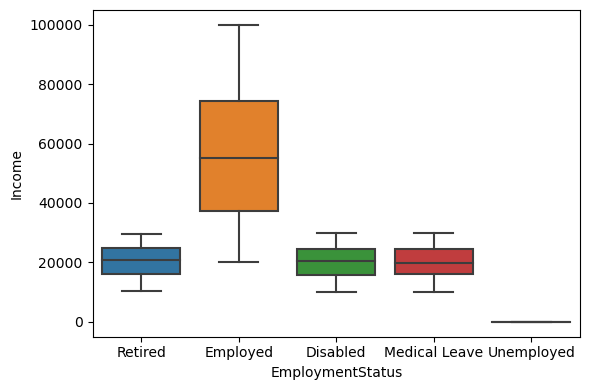

In [110]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['EmploymentStatus'], y=df['Income'])
plt.tight_layout();

In [111]:
df.groupby(['EmploymentStatus'])['Income'].mean()

EmploymentStatus
Disabled         20073.138889
Employed         56449.113273
Medical Leave    20145.767241
Retired          20368.857143
Unemployed           0.000000
Name: Income, dtype: float64

**Correlation Between CLV Score and Numerical Variables**

<Axes: >

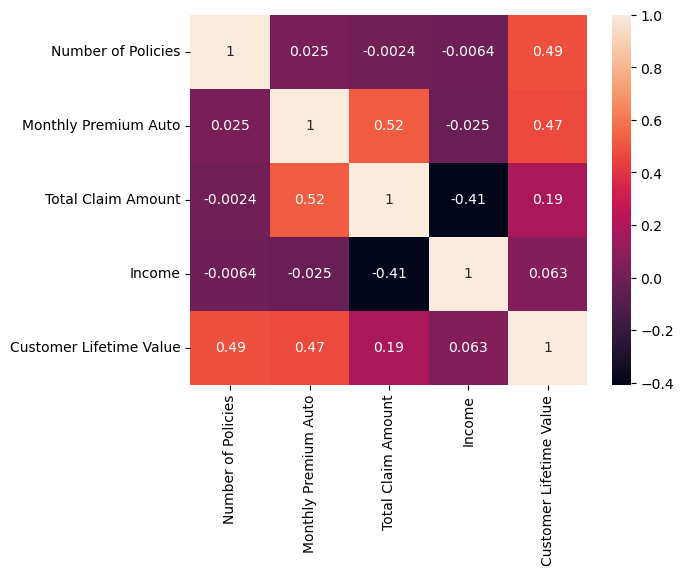

In [35]:
sns.heatmap(df.corr(method='spearman', numeric_only=True), annot=True)

- CLV memiliki moderate korelasi (47%) pada monthly premium. <br> 
Business Context: <u>Semakin besar biaya perbulan yang dibayar customer, maka semakin besar score customer</u>
- Korelasi searah antara CLV dan Total Claim, indikasi semakin besar total claim amount semakin besar nilai clv, namun korelasi ini termasuk korelasi lemah dengan strength 19%. <br>
Business Context: <u>Beberapa data menjelaskan bahwa besaran jumlah claim yang dibayar perusahaan berbanding lurus dengan nilai customer tsb</u>
- Income dan Total Claim Amount memiliki moderate / korelasi sedang yang berlawan (41%). <br>
Business Context: <u>Besaran nilai pada jumlah claim yang dibayar perusahaan berbanding terbalik dengan besaran nilai pada penghasilan customer</u>
- Total Claim Amount and Monthly Premium Auto memiliki relasi positif cukup kuat (52%). <br>
Business Context: <u>Semakin besar biaya perbulan yang dibayar customer, semakin besar total claim yang diberikan perusahaan.</u>
<br><br>
**Pre-conclusion 1 : Korelasi atas menunjukkan bahwa kecenderungan semakin rendah income customer perusahaan, ialah customer yang lebih willing dalam spending money pada asuransi kendaraan mereka.**

Text(0.5, 1.0, 'Outlier Threshold Detection')

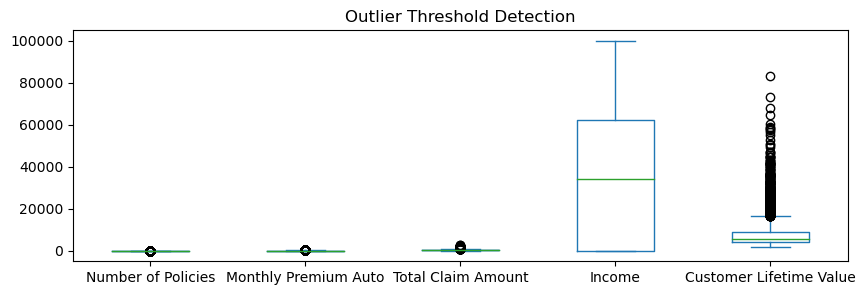

In [ ]:
df.plot(kind='box', figsize=(10,3))
plt.title('Outlier Threshold Detection')

Outlier dihiraukan dikarenakan informasi terkait high value/score customer berada pada rentang tersebut.

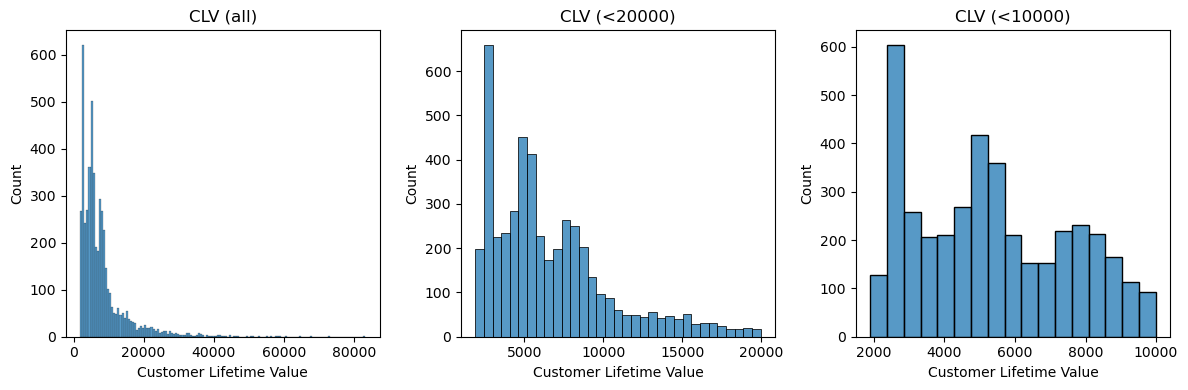

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(12, 4))
sns.histplot(ax=ax[0], data=df['Customer Lifetime Value'])
ax[0].set_title('CLV (all)')
sns.histplot(ax=ax[1], data=df[(df['Customer Lifetime Value']) < 20000]['Customer Lifetime Value'])
ax[1].set_title('CLV (<20000)')
sns.histplot(ax=ax[2], data=df[(df['Customer Lifetime Value']) <= 10000]['Customer Lifetime Value'])
ax[2].set_title('CLV (<10000)')
plt.tight_layout()

**Analisis pendekatan model terhadap data:**
- Jumlah data semakin menurun seiring meningkatnya score clv, *potensi adanya indikasi kesulitan dalam memprediksi score customer*

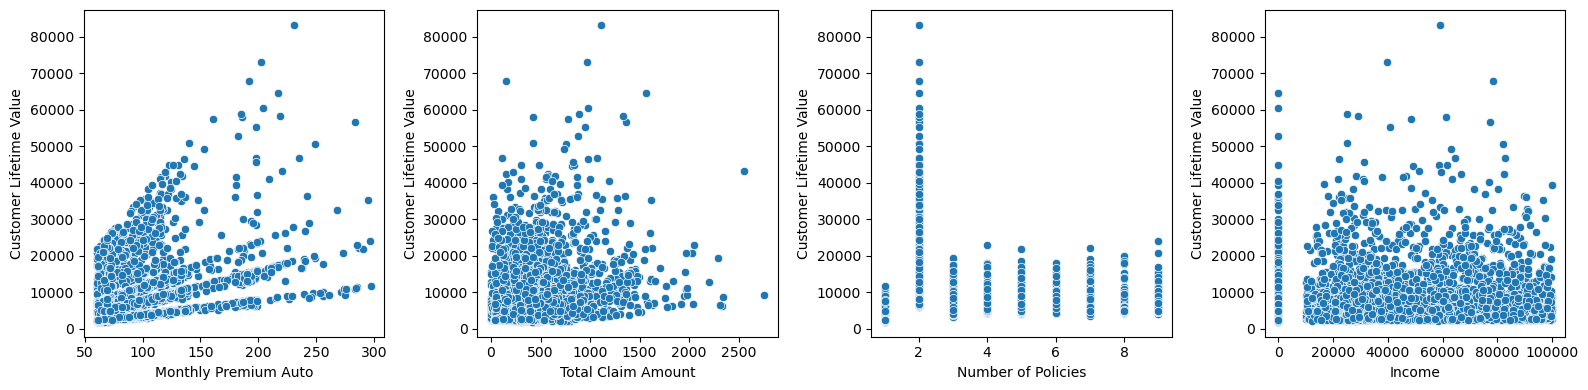

In [84]:
fig, ax = plt.subplots(1,4, figsize=(16,4))
sns.scatterplot(ax=ax[0], data = df, y='Customer Lifetime Value', x='Monthly Premium Auto')
sns.scatterplot(ax=ax[1], data = df, y='Customer Lifetime Value', x='Total Claim Amount')
sns.scatterplot(ax=ax[2], data = df, y='Customer Lifetime Value', x='Number of Policies')
sns.scatterplot(ax=ax[3], data = df, y='Customer Lifetime Value', x='Income')
plt.tight_layout();

- Kebanyakan data berkelompok pada rentang < 20000, maka kemungkinan potensi kesulitan model dalam memprediksi ada pada customer yang memiliki characteristic dan score > 20000.
- Jika dilihat pada scatter, CLV & Monthly Premium memiliki indikasi hubungan linear, indikasi setiap kenaikan value pada "Monthly Premium" maka kenaikan juga pada CLV Score. *(lit. semakin besar besaran biaya perbulan yang dibayar maka semakin besar score customer tersebut)*
- High Value Customer (> 20000) memegang max 2 policies.

**Correlation Between CLV Score and Categorical Variables** 

In [43]:
lists = []
for i in df.select_dtypes('object').columns:
    lists.append([i, df[i].nunique(), df[i].unique()])

pd.DataFrame(lists, columns=['column', 'nunique', 'unique'])

,column,nunique,unique
0,Vehicle Class,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
1,Coverage,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
4,Marital Status,3,"[Divorced, Married, Single]"
5,Education,5,"[High School or Below, College, Master, Bachelor, Doctor]"


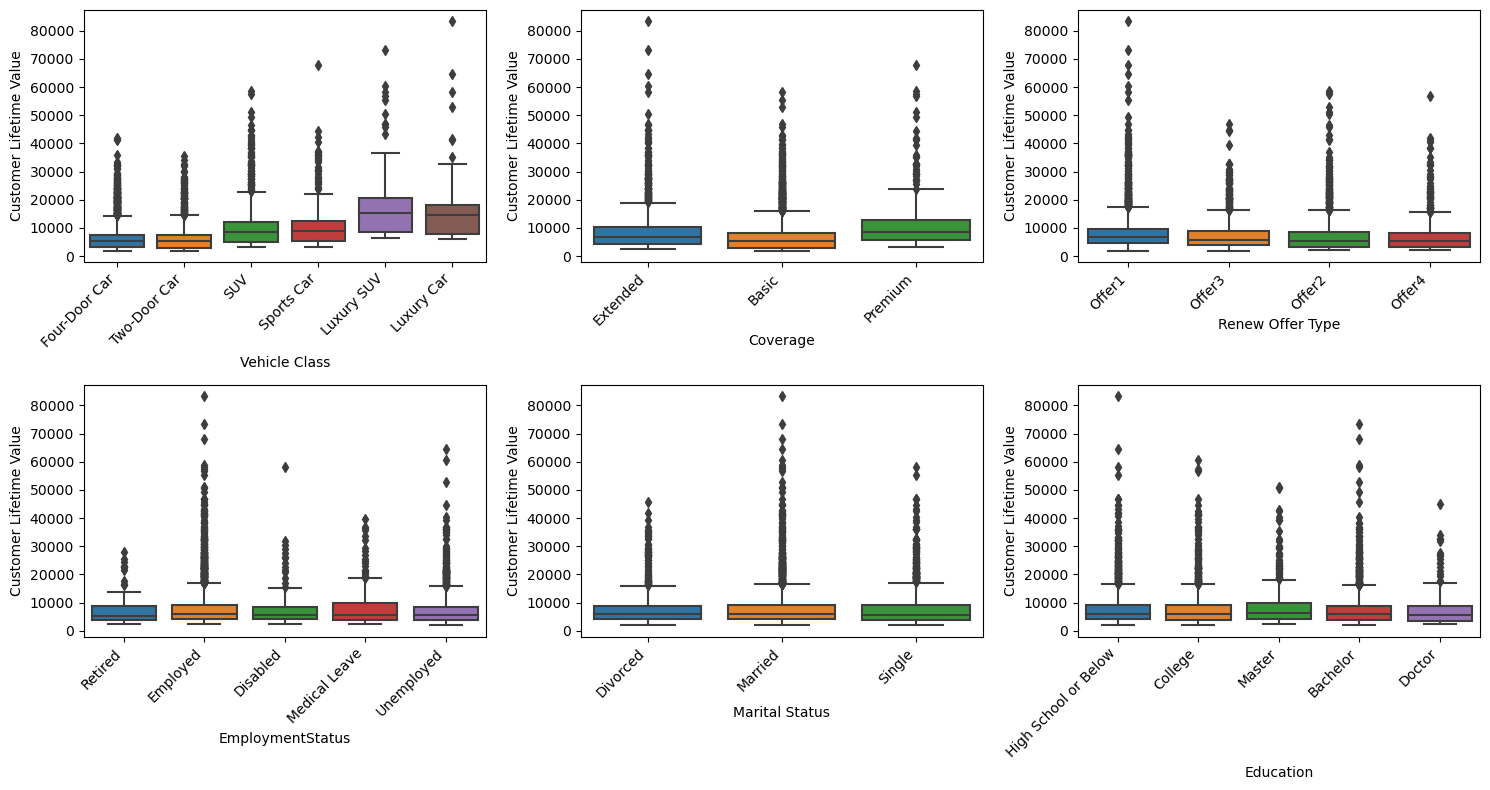

In [85]:
max_column = 3
max_row = 2
j,k = 0,0

fig, ax = plt.subplots(max_row,max_column, figsize=(15, 8))
for i in df.select_dtypes('object').columns:
    if k == max_column:
        j += 1
        k=0
        
    axes = sns.boxplot(ax=ax[j, k],data = df, x=i, y='Customer Lifetime Value')
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')
    k += 1

plt.tight_layout();

Correlated Features towards CLV: 
- Vehicle Class: Semakin tinggi level kendaraan yang dibeli, semakin tinggi score customer tersebut.
- Marital Status : Sebagian besar customer yang memiliki potensi value diatas 40000, ialah customer yang berstatus married.
- Employment Status : Customer dengan clv score tinggi kebanyakan employed customer. (Kecenderungan customer yang masih berstatus bekerja memiliki potensi dalam kenaikan score).
- Coverage: Extended coverage memiliki high value customer lebih tinggi dibanding jenis coverage lainnya.
- Renew Offer Type: Customer dengan CLV Score tinggi lebih banyak memilih tipe renewal offer 1.
- Education, berdasarkan penyebaran data pada data non-outlier, ke-5 status pendidikan tersebut tidak menunjukkan fluktuasi significant terhadap score clv yang menandakan tidak ada perbedaan/korelasi unik antara education dan clv, meskipun pada penyebaran data outlier diketahui data dengan high value customer cenderung berada pada customer status High School, namun secara realita semakin tinggi level pendidikan, jumlah manusia yang mencapai level tersebut semakin sedikit. <br>
Oleh karena itu fitur `Education` *belum bisa dijadikan patokan/dasar nilai clv*.

**Feature Selection**

In [5]:
selected_features = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Number of Policies',
       'Monthly Premium Auto', 'Total Claim Amount', 'Income',
       'Customer Lifetime Value']

In [6]:
df = df[selected_features]

**Feature Engineer**

In [7]:
categorical_features = ['EmploymentStatus', 'Marital Status', 'Renew Offer Type']
ordinal_features = ['Vehicle Class', 'Coverage']

categorical_tf = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first')),
    ]
)

# Define order
vehicle_class_order = ['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury SUV', 'Sports Car', 'Luxury Car']
coverage_order = ['Basic', 'Extended', 'Premium']
# education_order = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']
ordinal_tf = Pipeline(
    steps=[
        ('ordinal', OrdinalEncoder(categories=[vehicle_class_order, coverage_order]))
    ]
)

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_tf, categorical_features),
    ('ordinal', ordinal_tf, ordinal_features)
], remainder='passthrough')

In [8]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['EmploymentStatus', 'Marital Status',
                                  'Renew Offer Type']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(categories=[['Four-Door '
                                                                              'Car',
                                                                              'Two-Door '
                                                                              'Car',
                                                                              'SUV',
                                                                              'Luxury '
                                                                              'SUV',
                                                                              'Sports '
                                                                              'Car',
                                                                              'Luxury '
                                                                              'Car'],
                                                                             ['Basic',
                                                                              'Extended',
                                                                              'Premium']]))]),
                                 ['Vehicle Class', 'Coverage'])])

In [9]:
df_category = preprocessor.fit_transform(df)
feature_names = preprocessor.get_feature_names_out()
feature_names = [name.split('__')[1] if '__' in name else name for name in feature_names]

encoded_df = pd.DataFrame(df_category, columns=feature_names)

In [9]:
encoded_df.head(2)

,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Marital Status_Married,Marital Status_Single,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Vehicle Class,Coverage,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,90.0,571.479602,11828.0,10083.486880
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,62.0,114.514440,44762.0,4943.386117


**Model yang akan diuji:**
- Random Forest: Ensemble method dimana cara kerja membentuk beberapa decision tree dan mengkombinasikan hasil prediksi dari rata masing-masing decision tree tersebut, less sensitive terhadap outlier. 
- Gradient Boosting Regressor: sequential training pada cara kerja model memungkinkan model dalam meminimalisir error.

In [11]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_absolute_percentage_error, make_scorer

In [12]:
models = ['RandomForestRegressor', 'GradientBoostingRegressor']

**Data Selection**

In [13]:
from sklearn.model_selection import KFold, cross_val_score

In [62]:
rf = RandomForestRegressor()
gbm = GradientBoostingRegressor()

In [10]:
X = encoded_df.drop(columns=['Customer Lifetime Value'], axis=1)
y = encoded_df['Customer Lifetime Value']

In [15]:
kf = KFold(n_splits=7, shuffle=True, random_state=42)

In [16]:
rf_scores = cross_val_score(rf, X, y, scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False), cv=kf)
gbm_scores = cross_val_score(gbm, X, y, scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False), cv=kf)

In [17]:
print(f'Random Forest CrossVal: {rf_scores}')
print(f'Gradient Boosting Regressor CrossVal: {gbm_scores}')

Random Forest CrossVal: [-0.13053519 -0.1300108  -0.13628446 -0.11949637 -0.11918822 -0.12161968
 -0.11229528]
Gradient Boosting Regressor CrossVal: [-0.13898122 -0.15172707 -0.15764248 -0.13966903 -0.14605718 -0.14375465
 -0.13653847]


Percobaan crossval dari kedua model mendapati model `Random Forest` mampu menghasilkan rata percentase error lebih rendah dibandingkan gradient boosting.

In [18]:
def best_feature_index(th_fold, kf, X):
    for fold, (train_index, val_index) in enumerate(kf.split(X)):
        if fold == th_fold:
            X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
            y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
        
            return X_train_fold, X_val_fold, y_train_fold, y_val_fold

In [19]:
rf_X_train_fold, rf_X_val_fold, rf_y_train_fold, rf_y_val_fold = best_feature_index(rf_scores.argmax(), kf, X)
gbm_X_train_fold, gbm_X_val_fold, gbm_y_train_fold, gbm_y_val_fold = best_feature_index(gbm_scores.argmax(), kf, X)

**Data Splitting**

RandomForest merupakan tree-based model yang melakukan pembagian data berdasarkan range nilai fitur tertentu, sehingga scaling fitur tidak berpengaruh.

In [21]:
rf.fit(rf_X_train_fold, rf_y_train_fold)
gbm.fit(gbm_X_train_fold, gbm_y_train_fold)

GradientBoostingRegressor()

**Train Evaluation**

In [48]:
ytrain_pred = rf.predict(rf_X_train_fold)
gbm_ytrain_pred = gbm.predict(gbm_X_train_fold)

In [49]:
error_summaries = {}

for i in models:
    error_summary = pd.DataFrame
    if i == 'RandomForestRegressor':
        error_summary = pd.concat([pd.DataFrame(rf_y_train_fold.reset_index(drop=True)), pd.DataFrame(ytrain_pred, columns=['pred'])], axis=1)
    elif i == 'GradientBoostingRegressor':
        error_summary = pd.concat([pd.DataFrame(gbm_y_train_fold.reset_index(drop=True)), pd.DataFrame(gbm_ytrain_pred, columns=['pred'])], axis=1)
        
    error_summary.rename(columns={'Customer Lifetime Value':'train_clv'}, inplace=True)
    error_summary['error'] = np.abs(error_summary['train_clv'] - error_summary['pred'])
    error_summary['error_percentage'] = round(error_summary['error']*100/error_summary['train_clv'],2)
    error_summaries[i] = error_summary
    

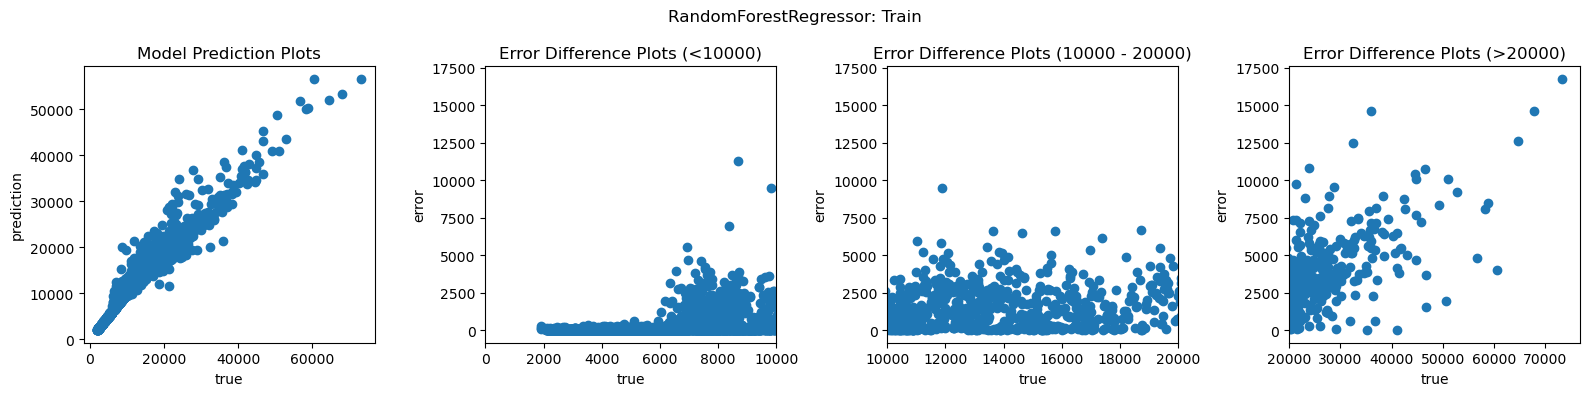

In [24]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.scatter(x=error_summaries['RandomForestRegressor']['train_clv'], y=error_summaries['RandomForestRegressor']['pred'])
plt.title('Model Prediction Plots')
plt.xlabel('true')
plt.ylabel('prediction')

plt.subplot(1, 4, 2)
plt.scatter(x=error_summaries['RandomForestRegressor']['train_clv'], y=error_summaries['RandomForestRegressor']['error'])
plt.title('Error Difference Plots (<10000)')
plt.xlabel('true')
plt.ylabel('error')
plt.xlim(0, 10000)

plt.subplot(1, 4, 3)
plt.scatter(x=error_summaries['RandomForestRegressor']['train_clv'], y=error_summaries['RandomForestRegressor']['error'])
plt.title('Error Difference Plots (10000 - 20000)')
plt.xlabel('true')
plt.ylabel('error')
plt.xlim(10000, 20000)

plt.subplot(1, 4, 4)
plt.scatter(x=error_summaries['RandomForestRegressor']['train_clv'], y=error_summaries['RandomForestRegressor']['error'])
plt.title('Error Difference Plots (>20000)')
plt.xlabel('true')
plt.ylabel('error')
plt.xlim(20000)

plt.suptitle('RandomForestRegressor: Train')
plt.tight_layout()

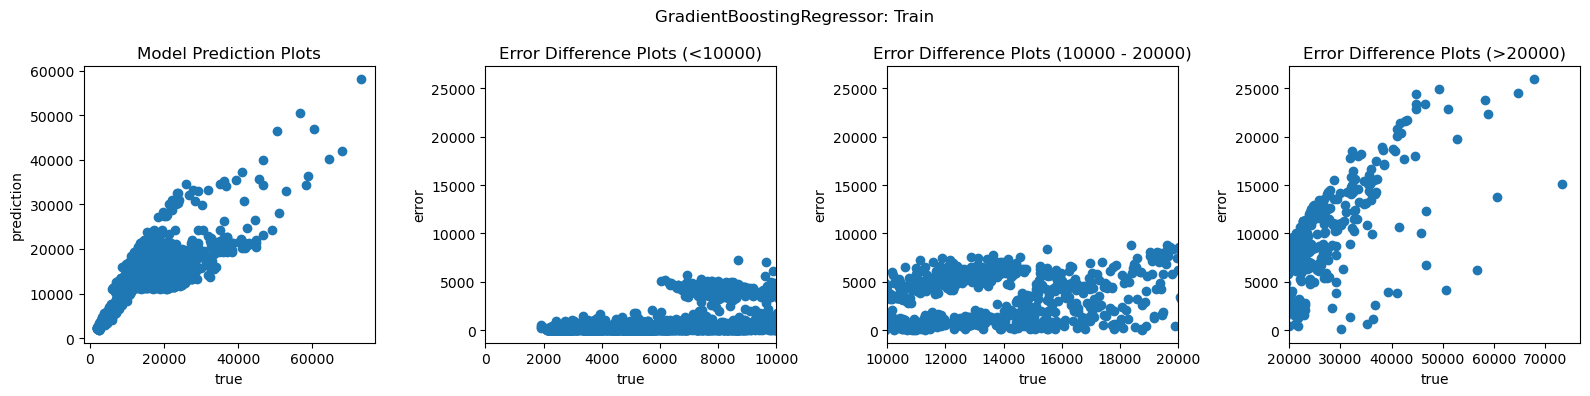

In [25]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.scatter(x=error_summaries['GradientBoostingRegressor']['train_clv'], y=error_summaries['GradientBoostingRegressor']['pred'])
plt.title('Model Prediction Plots')
plt.xlabel('true')
plt.ylabel('prediction')

plt.subplot(1, 4, 2)
plt.scatter(x=error_summaries['GradientBoostingRegressor']['train_clv'], y=error_summaries['GradientBoostingRegressor']['error'])
plt.title('Error Difference Plots (<10000)')
plt.xlabel('true')
plt.ylabel('error')
plt.xlim(0, 10000)

plt.subplot(1, 4, 3)
plt.scatter(x=error_summaries['GradientBoostingRegressor']['train_clv'], y=error_summaries['GradientBoostingRegressor']['error'])
plt.title('Error Difference Plots (10000 - 20000)')
plt.xlabel('true')
plt.ylabel('error')
plt.xlim(10000, 20000)

plt.subplot(1, 4, 4)
plt.scatter(x=error_summaries['GradientBoostingRegressor']['train_clv'], y=error_summaries['GradientBoostingRegressor']['error'])
plt.title('Error Difference Plots (>20000)')
plt.xlabel('true')
plt.ylabel('error')
plt.xlim(20000)

plt.suptitle('GradientBoostingRegressor: Train')
plt.tight_layout()

In [50]:
error_results = {}
r2_score, medae, mape, rmse = 0,0,0,0
for i in models:
    if i == 'RandomForestRegressor':
        r2_score = rf.score(rf_X_train_fold, rf_y_train_fold)
        medae = median_absolute_error(rf_y_train_fold, ytrain_pred)
        rmse = mean_squared_error(rf_y_train_fold, ytrain_pred, squared=False)
        mape = mean_absolute_percentage_error(rf_y_train_fold, ytrain_pred)
    elif i == 'GradientBoostingRegressor':
        r2_score = gbm.score(gbm_X_train_fold, gbm_y_train_fold)
        medae = median_absolute_error(gbm_y_train_fold, gbm_ytrain_pred)
        rmse = mean_squared_error(gbm_y_train_fold, gbm_ytrain_pred, squared=False)
        mape = mean_absolute_percentage_error(gbm_y_train_fold, gbm_ytrain_pred)
    error_results[i] = {}
    error_results[i]['R2_Score'] = r2_score
    error_results[i]['MedAE'] = medae
    error_results[i]['MedAPE'] = np.median(error_summaries[i]['error_percentage'])
    error_results[i]['RMSE'] = rmse
    error_results[i]['MAPE'] = mape*100

In [51]:
train_result = pd.DataFrame(error_results)
train_result

,RandomForestRegressor,GradientBoostingRegressor
R2_Score,0.946758,0.741930
MedAE,39.193280,255.094866
MedAPE,0.750000,5.245000
RMSE,1586.757128,3493.421259
MAPE,4.705574,13.241745


Kemampuan Random Forest dalam memprediksi kembali clv pada data train bisa digolongkan baik, persentase model dalam mengenali ciri data 94.67% > GradientBoosting 74.19%. <br>
Persentase MAPE 4.7% pada random forest berada jauh cukup significant jika dibandingkan dengan GBR, hal tersebut menunjukkan margin kesalahan prediksi random forest tidak sebesar gradient boosting.<br>
Namun score baik pada train random forest bisa terjadi karena cara kerja random forest memiliki potensi model terlalu mempelajari data sehingga berpotensi overfit. Oleh karena itu akan dilakukan uji coba pada unseen ciri yang dilakukan di analisis berikutnya.

In [ ]:
train_df = pd.concat([rf_X_train_fold, rf_y_train_fold], axis=1).reset_index()
train_df = pd.concat([train_df, error_summaries['RandomForestRegressor'][['pred', 'error',  'error_percentage']]], axis=1)

**Test Evaluation**

In [53]:
y_pred = rf.predict(rf_X_val_fold)
gbm_y_pred = gbm.predict(gbm_X_val_fold)

In [54]:
error_summaries = {}

for i in models:
    error_summary = pd.DataFrame  # Initialize an empty DataFrame
    if i == 'RandomForestRegressor':
        error_summary = pd.concat([pd.DataFrame(rf_y_val_fold.reset_index(drop=True)), pd.DataFrame(y_pred, columns=['pred'])], axis=1)
    elif i == 'GradientBoostingRegressor':
        error_summary = pd.concat([pd.DataFrame(gbm_y_val_fold.reset_index(drop=True)), pd.DataFrame(gbm_y_pred, columns=['pred'])], axis=1)
   
    error_summary.rename(columns={'Customer Lifetime Value':'test_clv'}, inplace=True)
    error_summary['error'] = np.abs(error_summary['test_clv'] - error_summary['pred'])
    error_summary['error_percentage'] = round(error_summary['error']*100/error_summary['test_clv'],2)
    error_summaries[i] = error_summary



In [55]:
error_results = {}
r2_score, medae, mape, rmse = 0,0,0,0
for i in models:
    if i == 'RandomForestRegressor':
        r2_score = rf.score(rf_X_val_fold, rf_y_val_fold)
        medae = median_absolute_error(rf_y_val_fold, y_pred)
        rmse = mean_squared_error(rf_y_val_fold, y_pred, squared=False)
        mape = mean_absolute_percentage_error(rf_y_val_fold, y_pred)
    elif i == 'GradientBoostingRegressor':
        r2_score = gbm.score(gbm_X_val_fold, gbm_y_val_fold)
        medae = median_absolute_error(gbm_y_val_fold, gbm_y_pred)
        rmse = mean_squared_error(gbm_y_val_fold, gbm_y_pred, squared=False)
        mape = mean_absolute_percentage_error(gbm_y_val_fold, gbm_y_pred)

    error_results[i] = {}
    error_results[i]['R2_Score'] = r2_score
    error_results[i]['MedAE'] = medae
    error_results[i]['MedAPE'] = np.median(error_summaries[i]['error_percentage'])
    error_results[i]['RMSE'] = rmse
    error_results[i]['MAPE'] = mape*100

In [56]:
test_result = pd.DataFrame(error_results)
test_result

,RandomForestRegressor,GradientBoostingRegressor
R2_Score,0.688726,0.699840
MedAE,105.441350,247.230373
MedAPE,1.910000,4.970000
RMSE,4253.955798,4177.323151
MAPE,11.418584,13.650022


Dalam mengenali ciri data GBR lebih unggul 1% dibandingkan RF. Besaran rata selisih error dalam unitnya (RMSE) GBR < RF, yang menunjukkan ketika selisih error kuadrat dari tiap data dijumlahkan, RF menghasilkan jumlah yg lebih besar, artinya selisih hasil pred dengan real value cukup jauh dalam skala unit.<br>

Namun melihat selisih RMSE kedua model sejauh +-80 point, bisa diasumsikan kemungkinan adanya salah satu atau sedikit data jika dibandingkan dengan selisih error (sebelum kuadrat) GBR, jarak keduanya tidak terlalu significant, namun ketika selisih tersebut dikuadratkan maka menghasilkan perbedaan significant antar kedua model yang menjadikan RF memiliki RMSE > GBR.<br> 

Bukti yang mendukung jika dilihat RF MAPE 11.42% < GBR MAPE 13.65%.  

**Error Analysis**

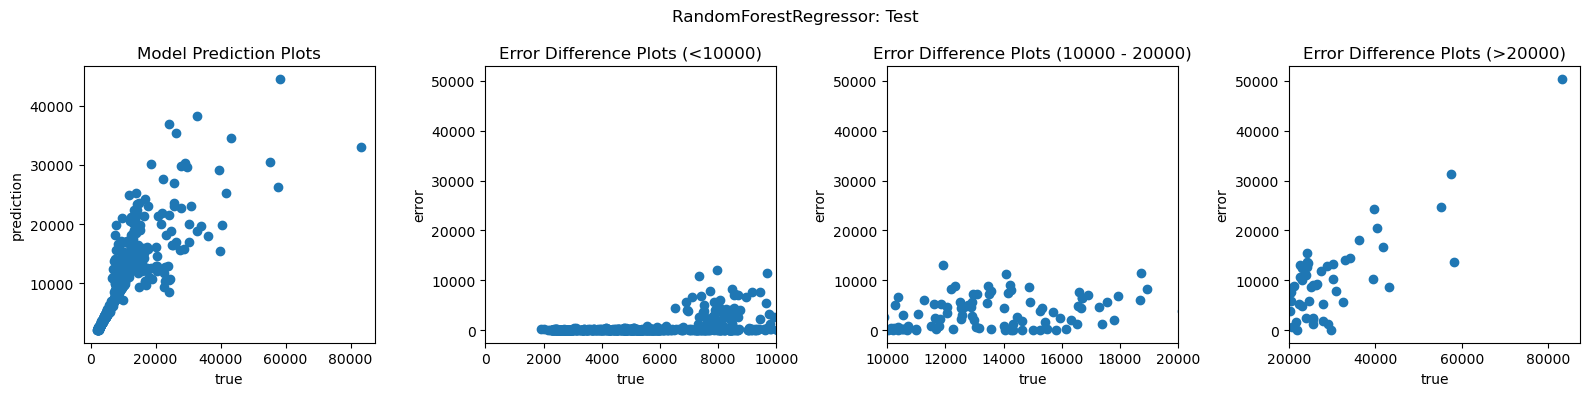

In [57]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.scatter(x=error_summaries['RandomForestRegressor']['test_clv'], y=error_summaries['RandomForestRegressor']['pred'])
plt.title('Model Prediction Plots')
plt.xlabel('true')
plt.ylabel('prediction')

plt.subplot(1, 4, 2)
plt.scatter(x=error_summaries['RandomForestRegressor']['test_clv'], y=error_summaries['RandomForestRegressor']['error'])
plt.title('Error Difference Plots (<10000)')
plt.xlabel('true')
plt.ylabel('error')
plt.xlim(0, 10000)

plt.subplot(1, 4, 3)
plt.scatter(x=error_summaries['RandomForestRegressor']['test_clv'], y=error_summaries['RandomForestRegressor']['error'])
plt.title('Error Difference Plots (10000 - 20000)')
plt.xlabel('true')
plt.ylabel('error')
plt.xlim(10000, 20000)

plt.subplot(1, 4, 4)
plt.scatter(x=error_summaries['RandomForestRegressor']['test_clv'], y=error_summaries['RandomForestRegressor']['error'])
plt.title('Error Difference Plots (>20000)')
plt.xlabel('true')
plt.ylabel('error')
plt.xlim(20000)

plt.suptitle('RandomForestRegressor: Test')
plt.tight_layout()

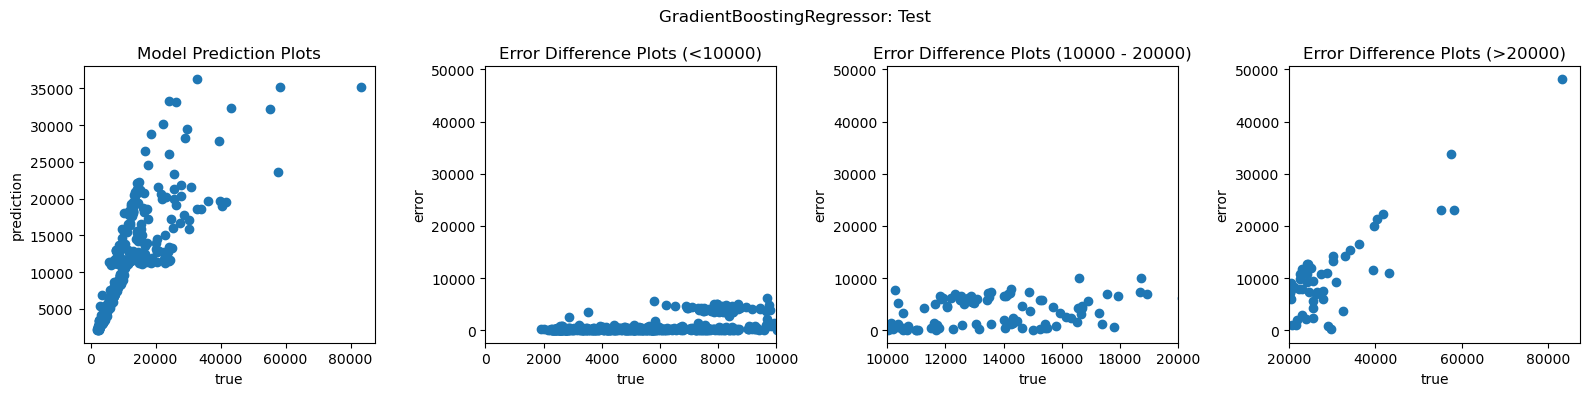

In [58]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.scatter(x=error_summaries['GradientBoostingRegressor']['test_clv'], y=error_summaries['GradientBoostingRegressor']['pred'])
plt.title('Model Prediction Plots')
plt.xlabel('true')
plt.ylabel('prediction')

plt.subplot(1, 4, 2)
plt.scatter(x=error_summaries['GradientBoostingRegressor']['test_clv'], y=error_summaries['GradientBoostingRegressor']['error'])
plt.title('Error Difference Plots (<10000)')
plt.xlabel('true')
plt.ylabel('error')
plt.xlim(0, 10000)

plt.subplot(1, 4, 3)
plt.scatter(x=error_summaries['GradientBoostingRegressor']['test_clv'], y=error_summaries['GradientBoostingRegressor']['error'])
plt.title('Error Difference Plots (10000 - 20000)')
plt.xlabel('true')
plt.ylabel('error')
plt.xlim(10000, 20000)

plt.subplot(1, 4, 4)
plt.scatter(x=error_summaries['GradientBoostingRegressor']['test_clv'], y=error_summaries['GradientBoostingRegressor']['error'])
plt.title('Error Difference Plots (>20000)')
plt.xlabel('true')
plt.ylabel('error')
plt.xlim(20000)

plt.suptitle('GradientBoostingRegressor: Test')
plt.tight_layout()

Pada rentang score < 10000, model menunjukkan kemampuan prediksi dengan baik dibandingkan ketika memasuki ciri customer pada score > 10000, outlier error mulai nampak semakin melesat jauh terutama ketika memasuki ciri score > 20000. <br>

Pada deskriptif analisis sebelumnya, 80% data merupakan data customer dibawah 10000, oleh karena itu model mengalami kesulitan dalam menentukan nilai score customer yang memiliki value > 10000. 

In [29]:
y_reset = rf_y_train_fold.reset_index(name='clv')

In [30]:
print(f"Jumlah data CLV dari range < 10000: {len(y_reset[(y_reset['clv'] < 10000)])}")
print(f"Jumlah data CLV dari range 10000 - 20000: {len(y_reset[(y_reset['clv'] <= 20000) & (y_reset['clv'] >= 10000)])}")
print(f"Jumlah data CLV dari range > 20000: {len(y_reset[(y_reset['clv'] > 20000)])}")

Jumlah data CLV dari range < 10000: 3426
Jumlah data CLV dari range 10000 - 20000: 632
Jumlah data CLV dari range > 20000: 272


In [171]:
test_df = pd.concat([rf_X_val_fold, rf_y_val_fold], axis=1).reset_index()
test_df = pd.concat([test_df, error_summaries['RandomForestRegressor'][['pred', 'error',  'error_percentage']]], axis=1)

Guna meminimalisir error, akan dilakukan beberapa pendekatan dengan tujuan agar model dapat menentukan nilai score dengan selisih error sekecil mungkin. Model yang akan digunakan RF & GBR, meskipun error GBR > RF, namun selisih kedua tidak terlalu significant terhadap unseen data, artinya masih ada potensi bagi GBR.

#### Log Transformation 
Skewed CLV pada dataset menyebabkan fokus model hanya pada majority data, yang menyebabkan model memiliki kecenderungan overlearn sehingga pattern yang dipelajari pada minority data menjadi kurang diperhatikan dan berujung pada biased understanding. <br>
Pengompressan data dilakukan agar characteristic dari minority data dapat masuk/berbaur kedalam range majority data, sehingga mempermudah model dalam mempelajari keseluruhan dataset.   

In [20]:
# data train yang digunakan merupakan best data train hasil cross val sebelumnya
rf_y_train_fold = rf_y_train_fold.to_frame(name='Customer Lifetime Value')
gbm_y_train_fold = gbm_y_train_fold.to_frame(name='Customer Lifetime Value')
rf_y_val_fold = rf_y_val_fold.to_frame(name='Customer Lifetime Value')
gbm_y_val_fold = gbm_y_val_fold.to_frame(name='Customer Lifetime Value')

In [21]:
rf_y_train_fold['log_clv'] = np.log1p(rf_y_train_fold['Customer Lifetime Value'])
gbm_y_train_fold['log_clv'] = np.log1p(gbm_y_train_fold['Customer Lifetime Value'])
rf_y_val_fold['log_clv'] = np.log1p(rf_y_val_fold['Customer Lifetime Value'])
gbm_y_val_fold['log_clv'] = np.log1p(gbm_y_val_fold['Customer Lifetime Value'])

In [72]:
rf.fit(rf_X_train_fold, rf_y_train_fold['log_clv'])
gbm.fit(gbm_X_train_fold, gbm_y_train_fold['log_clv'])

GradientBoostingRegressor()

In [83]:
rf_pred = rf.predict(rf_X_val_fold)
gbm_pred = gbm.predict(gbm_X_val_fold)

In [85]:
error_summaries = {}

for i in models:
    error_summary = pd.DataFrame  # Initialize an empty DataFrame
    if i == 'RandomForestRegressor':
        error_summary = pd.concat([pd.DataFrame(rf_y_val_fold.reset_index(drop=True)), pd.DataFrame(rf_pred, columns=['pred'])], axis=1)
    elif i == 'GradientBoostingRegressor':
        error_summary = pd.concat([pd.DataFrame(gbm_y_val_fold.reset_index(drop=True)), pd.DataFrame(gbm_pred, columns=['pred'])], axis=1)
   
    error_summary.rename(columns={'Customer Lifetime Value':'test_clv'}, inplace=True)
    error_summary['error'] = np.abs(error_summary['test_clv'] - np.expm1(error_summary['pred']))
    error_summary['error_percentage'] = round(error_summary['error']*100/error_summary['test_clv'],2)
    error_summaries[i] = error_summary


In [87]:
error_results = {}
r2_score, medae, mape, rmse = 0,0,0,0
for i in models:
    if i == 'RandomForestRegressor':
        r2_score = rf.score(rf_X_val_fold, rf_y_val_fold['log_clv'])
        medae = median_absolute_error(rf_y_val_fold['Customer Lifetime Value'], np.expm1(rf_pred))
        rmse = mean_squared_error(rf_y_val_fold['Customer Lifetime Value'], np.expm1(rf_pred), squared=False)
        mape = mean_absolute_percentage_error(rf_y_val_fold['Customer Lifetime Value'], np.expm1(rf_pred))
    elif i == 'GradientBoostingRegressor':
        r2_score = gbm.score(gbm_X_val_fold, gbm_y_val_fold['log_clv'])
        medae = median_absolute_error(gbm_y_val_fold['Customer Lifetime Value'], np.expm1(gbm_pred))
        rmse = mean_squared_error(gbm_y_val_fold['Customer Lifetime Value'], np.expm1(gbm_pred), squared=False)
        mape = mean_absolute_percentage_error(gbm_y_val_fold['Customer Lifetime Value'], np.expm1(gbm_pred))

    error_results[i] = {}
    error_results[i]['R2_Score'] = r2_score
    error_results[i]['MedAE'] = medae
    error_results[i]['MedAPE'] = np.median(error_summaries[i]['error_percentage'])
    error_results[i]['RMSE'] = rmse
    error_results[i]['MAPE'] = mape*100

In [88]:
log_test_result = pd.DataFrame(error_results)
log_test_result

,RandomForestRegressor,GradientBoostingRegressor
R2_Score,0.897579,0.905141
MedAE,104.256853,121.787393
MedAPE,1.880000,2.590000
RMSE,4282.268572,4319.791963
MAPE,10.061221,10.409206


**Summary** : Hasil Transformasi CLV mampu mengurangi nilai error pada prediksi model, terutama model GBR dengan persentase error dari 13.65% menjadi 10.41%, sedangkan model RF: 11.42% menjadi 10.11%. Kemampuan model dalam mengenali minority data pun menjadi lebih baik dari yang awal RF: 68.87% menjadi 89.97% sedangkan GBR: 69.98% menjadi 90.51%<br>

In [89]:
train_rf_pred = rf.predict(rf_X_train_fold)
train_gbm_pred = gbm.predict(gbm_X_train_fold)

In [95]:
error_summaries = {}

for i in models:
    error_summary = pd.DataFrame  # Initialize an empty DataFrame
    if i == 'RandomForestRegressor':
        error_summary = pd.concat([pd.DataFrame(rf_y_train_fold.reset_index(drop=True)), pd.DataFrame(train_rf_pred, columns=['pred'])], axis=1)
    elif i == 'GradientBoostingRegressor':
        error_summary = pd.concat([pd.DataFrame(gbm_y_train_fold.reset_index(drop=True)), pd.DataFrame(train_gbm_pred, columns=['pred'])], axis=1)
   
    error_summary.rename(columns={'Customer Lifetime Value':'train_clv'}, inplace=True)
    error_summary['error'] = np.abs(error_summary['train_clv'] - np.expm1(error_summary['pred']))
    error_summary['error_percentage'] = round(error_summary['error']*100/error_summary['train_clv'],2)
    error_summaries[i] = error_summary


In [96]:
error_results = {}
r2_score, medae, mape, rmse = 0,0,0,0
for i in models:
    if i == 'RandomForestRegressor':
        r2_score = rf.score(rf_X_train_fold, rf_y_train_fold['log_clv'])
        medae = median_absolute_error(rf_y_train_fold['Customer Lifetime Value'], np.expm1(train_rf_pred))
        rmse = mean_squared_error(rf_y_train_fold['Customer Lifetime Value'], np.expm1(train_rf_pred), squared=False)
        mape = mean_absolute_percentage_error(rf_y_train_fold['Customer Lifetime Value'], np.expm1(train_rf_pred))
    elif i == 'GradientBoostingRegressor':
        r2_score = gbm.score(gbm_X_train_fold, gbm_y_train_fold['log_clv'])
        medae = median_absolute_error(gbm_y_train_fold['Customer Lifetime Value'], np.expm1(train_gbm_pred))
        rmse = mean_squared_error(gbm_y_train_fold['Customer Lifetime Value'], np.expm1(train_gbm_pred), squared=False)
        mape = mean_absolute_percentage_error(gbm_y_train_fold['Customer Lifetime Value'], np.expm1(train_gbm_pred))

    error_results[i] = {}
    error_results[i]['R2_Score'] = r2_score
    error_results[i]['MedAE'] = medae
    error_results[i]['MedAPE'] = np.median(error_summaries[i]['error_percentage'])
    error_results[i]['RMSE'] = rmse
    error_results[i]['MAPE'] = mape*100

In [97]:
log_train_result = pd.DataFrame(error_results)
log_train_result

,RandomForestRegressor,GradientBoostingRegressor
R2_Score,0.982898,0.910453
MedAE,38.474981,132.615376
MedAPE,0.740000,2.550000
RMSE,1784.244775,3685.730687
MAPE,4.105563,10.056786


#### Hyperparameter Tuning

In [108]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer

In [105]:
trees = rf.estimators_
depths = [tree.get_depth() for tree in trees]
rf_summary = {
    "n_estimators": len(trees),
    "min_depth":np.min(depths),
    "max_depth":np.max(depths),
    "avg_depth":np.mean(depths),
}
rf_summary

{'n_estimators': 100, 'min_depth': 21, 'max_depth': 30, 'avg_depth': 23.83}

In [109]:
forest_search = {
    'model': [RandomForestRegressor()],
    'model__max_depth': Integer(10, 50),
    'model__min_samples_split': Integer(2, 20),
    'model__min_samples_leaf': Integer(1, 20),
    'model__n_estimators': Integer(50, 300),
}

boosting_search = {
    'model': [GradientBoostingRegressor()],
    'model__learning_rate': Real(0.005, 0.9, prior="log-uniform"),
    'model__n_estimators': Integer(50, 300),
    'model__max_depth': Integer(2, 7)
}

In [114]:
forest_pipe = Pipeline([('model', RandomForestRegressor())])

In [129]:
boosting_pipe = Pipeline([('model', GradientBoostingRegressor())])

In [130]:
boosting_opt = BayesSearchCV(
    boosting_pipe,
    # [(forest_search, 100), (boosting_search, 100)],
    [(boosting_search,100)],
    cv=kf,
    scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False),
    random_state=42
)

boosting_opt.fit(gbm_X_train_fold, gbm_y_train_fold['log_clv'])

BayesSearchCV(cv=KFold(n_splits=7, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('model',
                                         GradientBoostingRegressor())]),
              random_state=42,
              scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False),
              search_spaces=[({'model': [GradientBoostingRegressor(learning_rate=0.020894694091900853,
                                                                   max_depth=6,
                                                                   n_estimators=214)],
                               'model__learning_rate': Real(low=0.005, high=0.9, prior='log-uniform', transform='normalize'),
                               'model__max_depth': Integer(low=2, high=7, prior='uniform', transform='normalize'),
                               'model__n_estimators': Integer(low=50, high=300, prior='uniform', transform='normalize')},
                              100)])

In [115]:
forest_opt = BayesSearchCV(
    forest_pipe,
    # [(forest_search, 100), (boosting_search, 100)],
    [(forest_search,100)],
    cv=kf,
    scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False),
    random_state=42
)

forest_opt.fit(rf_X_train_fold, rf_y_train_fold['log_clv'])

BayesSearchCV(cv=KFold(n_splits=7, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('model', RandomForestRegressor())]),
              random_state=42,
              scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False),
              search_spaces=[({'model': [RandomForestRegressor(max_depth=10,
                                                               min_samples_leaf=4,
                                                               n_estimators=300)],
                               'model__max_depth': Integer(low=10, high=50, prior='uniform', transform='normalize'),
                               'model__min_samples_leaf': Integer(low=1, high=20, prior='uniform', transform='normalize'),
                               'model__min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize'),
                               'model__n_estimators': Integer(low=50, high=300, prior='uniform', transform='normalize')},
                              100)])

In [ ]:
forest_tuned_model = forest_opt.best_estimator_
boosting_tuned_model = boosting_opt.best_estimator_

In [55]:
forest_tuned_model.fit(rf_X_train_fold, rf_y_train_fold['log_clv'])

RandomForestRegressor(max_depth=10, min_samples_leaf=4)

In [56]:
boosting_tuned_model.fit(gbm_X_train_fold, gbm_y_train_fold['log_clv'])

GradientBoostingRegressor(learning_rate=0.020894694091900853, max_depth=6,
                          n_estimators=214)

In [57]:
forest_tuned_pred = forest_tuned_model.predict(rf_X_val_fold)
boosting_tuned_pred = boosting_tuned_model.predict(gbm_X_val_fold)

In [107]:
error_summaries = {}

for i in models:
    error_summary = pd.DataFrame  # Initialize an empty DataFrame
    if i == 'RandomForestRegressor':
        error_summary = pd.concat([pd.DataFrame(rf_y_val_fold.reset_index(drop=True)), pd.DataFrame(forest_tuned_pred, columns=['pred'])], axis=1)
    elif i == 'GradientBoostingRegressor':
        error_summary = pd.concat([pd.DataFrame(gbm_y_val_fold.reset_index(drop=True)), pd.DataFrame(boosting_tuned_pred, columns=['pred'])], axis=1)
   
    error_summary.rename(columns={'Customer Lifetime Value':'test_clv'}, inplace=True)
    error_summary['error'] = np.abs(error_summary['test_clv'] - np.expm1(error_summary['pred']))
    error_summary['error_percentage'] = round(error_summary['error']*100/error_summary['test_clv'],2)
    error_summaries[i] = error_summary

test_summaries = error_summaries

In [99]:
error_results = {}
r2_score, medae, mape, rmse = 0,0,0,0
for i in models:
    if i == 'RandomForestRegressor':
        r2_score = forest_tuned_model.score(rf_X_val_fold, rf_y_val_fold['log_clv'])
        medae = median_absolute_error(rf_y_val_fold['Customer Lifetime Value'], np.expm1(forest_tuned_pred))
        rmse = mean_squared_error(rf_y_val_fold['Customer Lifetime Value'], np.expm1(forest_tuned_pred), squared=False)
        mape = mean_absolute_percentage_error(rf_y_val_fold['Customer Lifetime Value'], np.expm1(forest_tuned_pred))
    elif i == 'GradientBoostingRegressor':
        r2_score = boosting_tuned_model.score(gbm_X_val_fold, gbm_y_val_fold['log_clv'])
        medae = median_absolute_error(gbm_y_val_fold['Customer Lifetime Value'], np.expm1(boosting_tuned_pred))
        rmse = mean_squared_error(gbm_y_val_fold['Customer Lifetime Value'], np.expm1(boosting_tuned_pred), squared=False)
        mape = mean_absolute_percentage_error(gbm_y_val_fold['Customer Lifetime Value'], np.expm1(boosting_tuned_pred))

    error_results[i] = {}
    error_results[i]['R2_Score'] = r2_score
    error_results[i]['MedAE'] = medae
    error_results[i]['MedAPE'] = np.median(error_summaries[i]['error_percentage'])
    error_results[i]['RMSE'] = rmse
    error_results[i]['MAPE'] = mape*100

In [100]:
tuned_test_result = pd.DataFrame(error_results)

In [101]:
pd.concat([log_test_result, tuned_test_result], axis=1, keys=['Before', 'After'])

Before                            \
         RandomForestRegressor GradientBoostingRegressor   
R2_Score              0.897579                  0.905141   
MedAE               104.256853                121.787393   
MedAPE                1.880000                  2.590000   
RMSE               4282.268572               4319.791963   
MAPE                 10.061221                 10.409206   

                         After                            
         RandomForestRegressor GradientBoostingRegressor  
R2_Score              0.905406                  0.902963  
MedAE                97.849736                 94.077555  
MedAPE                2.000000                  1.900000  
RMSE               4196.328546               4358.551052  
MAPE                  9.809543                  9.859485

In [117]:
forest_tuned_train_pred = forest_tuned_model.predict(rf_X_train_fold)
boosting_tuned_train_pred = boosting_tuned_model.predict(gbm_X_train_fold)

In [118]:
error_summaries = {}

for i in models:
    error_summary = pd.DataFrame  # Initialize an empty DataFrame
    if i == 'RandomForestRegressor':
        error_summary = pd.concat([pd.DataFrame(rf_y_train_fold.reset_index(drop=True)), pd.DataFrame(forest_tuned_train_pred, columns=['pred'])], axis=1)
    elif i == 'GradientBoostingRegressor':
        error_summary = pd.concat([pd.DataFrame(gbm_y_train_fold.reset_index(drop=True)), pd.DataFrame(boosting_tuned_train_pred, columns=['pred'])], axis=1)
   
    error_summary.rename(columns={'Customer Lifetime Value':'train_clv'}, inplace=True)
    error_summary['error'] = np.abs(error_summary['train_clv'] - np.expm1(error_summary['pred']))
    error_summary['error_percentage'] = round(error_summary['error']*100/error_summary['train_clv'],2)
    error_summaries[i] = error_summary

train_summaries = error_summaries

In [119]:
error_results = {}
r2_score, medae, mape, rmse = 0,0,0,0
for i in models:
    if i == 'RandomForestRegressor':
        r2_score = forest_tuned_model.score(rf_X_train_fold, rf_y_train_fold['log_clv'])
        medae = median_absolute_error(rf_y_train_fold['Customer Lifetime Value'], np.expm1(forest_tuned_train_pred))
        rmse = mean_squared_error(rf_y_train_fold['Customer Lifetime Value'], np.expm1(forest_tuned_train_pred), squared=False)
        mape = mean_absolute_percentage_error(rf_y_train_fold['Customer Lifetime Value'], np.expm1(forest_tuned_train_pred))
    elif i == 'GradientBoostingRegressor':
        r2_score = boosting_tuned_model.score(gbm_X_train_fold, gbm_y_train_fold['log_clv'])
        medae = median_absolute_error(gbm_y_train_fold['Customer Lifetime Value'], np.expm1(boosting_tuned_train_pred))
        rmse = mean_squared_error(gbm_y_train_fold['Customer Lifetime Value'], np.expm1(boosting_tuned_train_pred), squared=False)
        mape = mean_absolute_percentage_error(gbm_y_train_fold['Customer Lifetime Value'], np.expm1(boosting_tuned_train_pred))

    error_results[i] = {}
    error_results[i]['R2_Score'] = r2_score
    error_results[i]['MedAE'] = medae
    error_results[i]['MedAPE'] = np.median(error_summaries[i]['error_percentage'])
    error_results[i]['RMSE'] = rmse
    error_results[i]['MAPE'] = mape*100

In [121]:
tuned_train_result = pd.DataFrame(error_results)
tuned_train_result

,RandomForestRegressor,GradientBoostingRegressor
R2_Score,0.937722,0.929466
MedAE,76.067533,83.286570
MedAPE,1.460000,1.615000
RMSE,3170.125126,3263.312859
MAPE,8.046740,8.492463


**Conclusion**: Hasil tuning dan tranformasi log sangat berpengaruh significant terhadap model GradientBoostingRegressor. Sebelum penerapan 2 pendekatan atas, hasil training menunjukkan keunggulan RandomForest dalam mempelajari ciri data (95%) dibandingkan GradientBoosting yang hanya mencapai 75%, sedangkan hasil testing membuktikan keunggulan random forest tidak berlaku ketika dilakukan uji testing yang hanya mencapai +- 69%, yang membuktikan bahwa model overlearn. <br>

Transformasi data dan tuning parameter dilakukan guna meningkatkan kemampuan model dalam mengenali seluruh data termasuk high extreme value data (lit. mengurangi bias model), dan mencegah overfit pada model.<br>
Hasil training dan testing RandomForest menunjukkan kestabilan model dengan gap R2 score train-test 3.2%, sedangkan GBR dari 75% mampu mencapai 92.95% (train) dan 70% mencapai 90.29%.<br>
Error outlier training yang berhasil diminimalisir dari 13% menjadi 8.5% (GBR), sedangkan RF dari 4% menjadi 8% (meskipun error RF meningkat namun indikasi model overlearn berkurang), untuk error outlier testing, GBR dari 13% menjadi 9.86% sedangkan RF dari 11.42% menjadi 9.81%.<br>

#### Anomaly Detection
Proses ini hanya sebagai informasi untuk mengidentifikasi data customer dengan score clv jauh dari normal data.

In [1]:
from sklearn.ensemble import IsolationForest

In [23]:
isolation_forest = IsolationForest(contamination=0.2)

In [133]:
isolation_forest.fit(train_summaries['RandomForestRegressor'][['train_clv']].values)

IsolationForest(contamination=0.2)

In [134]:
iso_train_pred = isolation_forest.predict(train_summaries['RandomForestRegressor'][['train_clv']].values)
iso_pred = isolation_forest.predict(test_summaries['RandomForestRegressor'][['test_clv']].values)

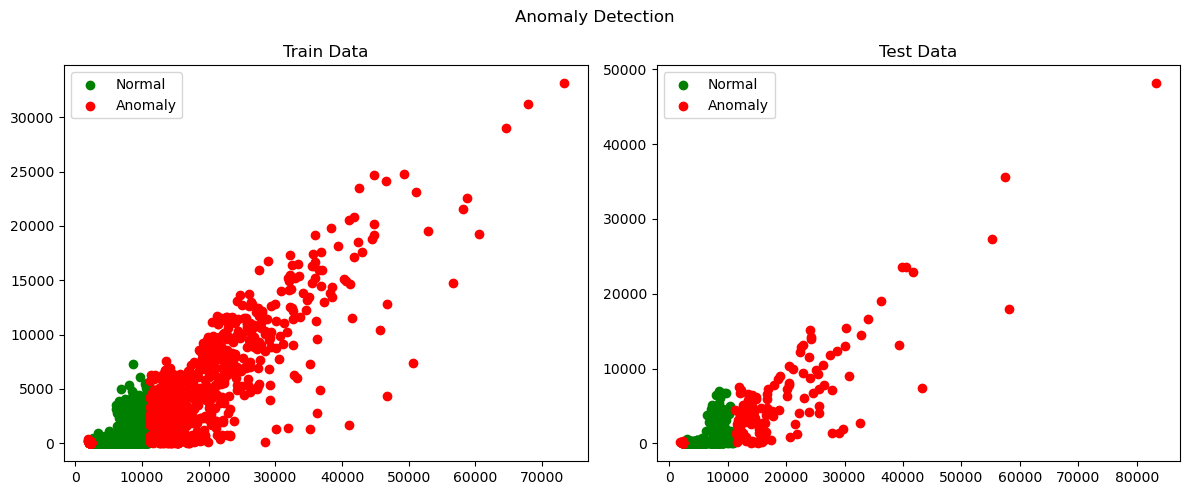

In [143]:
def create_scatter_plots(X1, y1, title1, X2=None, y2=None, title2=None):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].scatter(X1.loc[y1==1, 'train_clv'], X1.loc[y1==1, 'error'], color='green', label='Normal')
    axes[0].scatter(X1.loc[y1==-1, 'train_clv'], X1.loc[y1==-1, 'error'], color='red', label='Anomaly')
    axes[0].set_title(title1)
    axes[0].legend()

    axes[1].scatter(X2.loc[y2==1, 'test_clv'], X2.loc[y2==1, 'error'], color='green', label='Normal')
    axes[1].scatter(X2.loc[y2==-1, 'test_clv'], X2.loc[y2==-1, 'error'], color='red', label='Anomaly')
    axes[1].set_title(title2)
    axes[1].legend()

    plt.suptitle('Anomaly Detection')
    plt.tight_layout()
    plt.show()

create_scatter_plots(train_summaries['RandomForestRegressor'], iso_train_pred, 'Train Data', 
                     test_summaries['RandomForestRegressor'], iso_pred, 'Test Data')

Pengujian menunjukkan 20% data anomali berada pada rentang clv diatas 10000. Hal ini sebagai bukti pendukung pada descriptive analisis sebelumnya terkait 80% data merupakan customer clv < 10314.<br>
Anomali deteksi bisa digunakan untuk mengetahui dan melakukan analisis lebih dalam seperti kemungkinan error data ataupun menemukan high customer behaviour. <br>

-end-